In [3]:
# Reference: https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/
import tensorflow
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

tf.__version__

'2.8.0'

# Data Generation

In [6]:
# prepare train and test dataset
def prepare_data():
    # generate 2d classification dataset
    X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
    # one hot encode output variable
    y = to_categorical(y)
    # split into train and test
    n_train = 900
    X_train, X_test = X[:n_train, :], X[n_train:, :]
    y_train, y_test = y[:n_train], y[n_train:]
    return X_train, y_train, X_test, y_test

In [7]:
# prepare dataset
X_train, y_train, X_test, y_test = prepare_data()

# Model

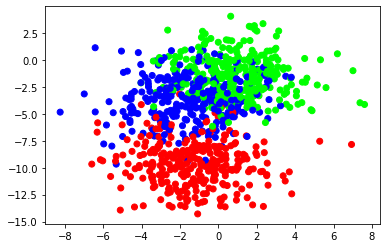

In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train)

In [9]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, bs):
    
    # define model
    model = Sequential()
    model.add(layers.Dense(50, input_dim=2, activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    
    # compile model
    opt = tf.keras.optimizers.SGD(learning_rate=0.01)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=bs, verbose=0)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('bs='+str(bs), pad=-50)

# Training

In [10]:
# create learning curves for different learning rates
batch_sizes = [1, 10, 50, 100, 500, 900]

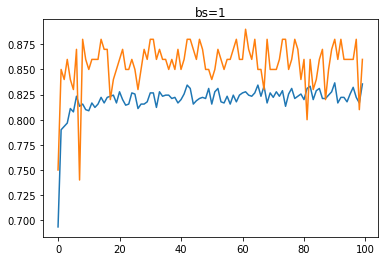

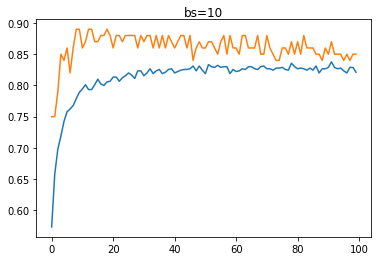

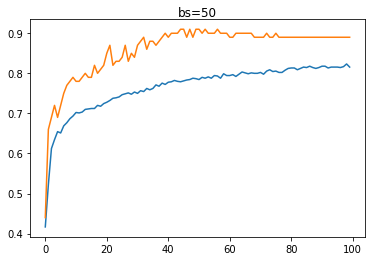

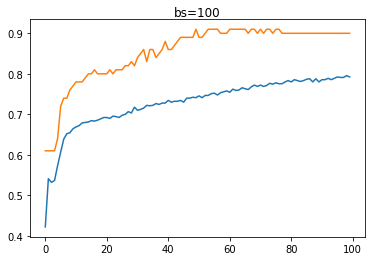

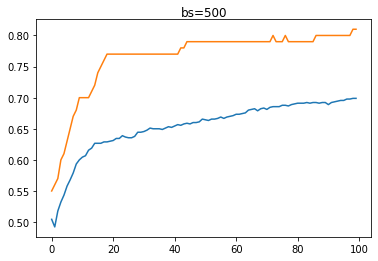

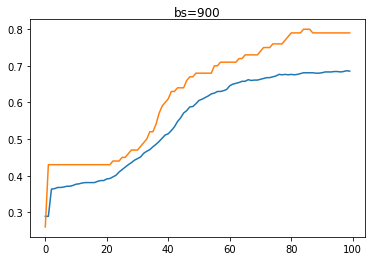

In [11]:
for i in range(len(batch_sizes)):
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])
    # show learning curves
    plt.show()